In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Csv file import
survey = pd.read_csv("survey_results_public.csv")
#Display all dataframe columns
pd.pandas.set_option('display.max_columns', None)

In [92]:
#Checking the file
survey.head()
survey.shape

# Questions that will be answered ##
#As a company, i want to know where to find the best programmers hence, where i can find a large pool of programmers, therefore the first question is going to be __Where do the survey respondants come from?__ With focus being on professional programmers

#The second question is going to be, __Are salaries dependant (at least in part) from the location of the programmer?__

#The third question is going to be __How much do specific types of companies pay for a professional developer?__

(51392, 154)

In [6]:
#Selecting only the relevant columns
columns = ['Respondent','Professional','Country', 'CompanyType','Salary']
#Creating a new dataframe with the relevant columns
data = survey[columns]

In [7]:
print(data.shape)
totalrow = data.shape[0]

(51392, 5)


In [8]:
data.head()

,Respondent,Professional,Country,CompanyType,Salary
0,1,Student,United States,NaN,NaN
1,2,Student,United Kingdom,"Privately-held limited company, not in startup...",NaN
2,3,Professional developer,United Kingdom,Publicly-traded corporation,113750.0
3,4,Professional non-developer who sometimes write...,United States,Non-profit/non-governmental organization or pr...,NaN
4,5,Professional developer,Switzerland,"Privately-held limited company, not in startup...",NaN


In [9]:
#Filtering for active professional programmers only
print(data["Professional"].value_counts())
data = data[data["Professional"] == "Professional developer"]
print(data.shape)

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64
(36131, 5)


In [10]:
#Handling missing data
missing = {}
for column in columns:
    sumnull = np.sum(data[column].isnull())
    perc = round(sumnull/totalrow,4)
    missing[column] = perc
    print(f'The column {column} has {sumnull} null values, which translates in approximately {perc*100}% of the values being missing')

The column Respondent has 0 null values, which translates in approximately 0.0% of the values being missing
The column Professional has 0 null values, which translates in approximately 0.0% of the values being missing
The column Country has 0 null values, which translates in approximately 0.0% of the values being missing
The column CompanyType has 4602 null values, which translates in approximately 8.95% of the values being missing
The column Salary has 23240 null values, which translates in approximately 45.22% of the values being missing


<function matplotlib.pyplot.show(close=None, block=None)>

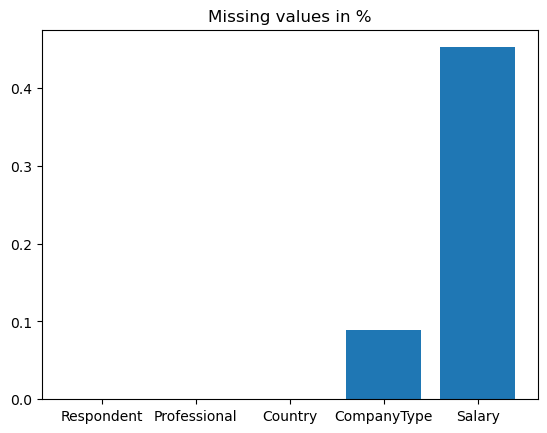

In [54]:
plt.title("Missing values in %")
plt.bar(range(len(missing)), list(missing.values()), align='center')
plt.xticks(range(len(missing)), list(missing.keys()))
plt.show

In [12]:
#Question 1 - Where do the survey respondants come from?
countries = data["Country"].value_counts()
#Median # of respondents 
countries.median()
#Mean # of respondents 
countries.mean()
#Focus on countries with more than 200 respondents (for a total of 33)
respondents = countries[data["Country"].value_counts() > 200]
print(respondents)


United States         8310
India                 3438
United Kingdom        3302
Germany               2767
Canada                1605
France                1246
Poland                 954
Spain                  688
Australia              643
Russian Federation     631
Brazil                 592
Netherlands            571
Italy                  536
Sweden                 460
Israel                 459
Romania                427
Switzerland            406
Austria                334
Iran                   314
Pakistan               307
South Africa           303
Belgium                297
Czech Republic         277
Ukraine                267
Ireland                266
Mexico                 259
Turkey                 252
Hungary                234
Denmark                223
Slovenia               218
Finland                206
Bulgaria               206
Greece                 202
Name: Country, dtype: int64


<AxesSubplot:title={'center':'Number of respondents by country'}>

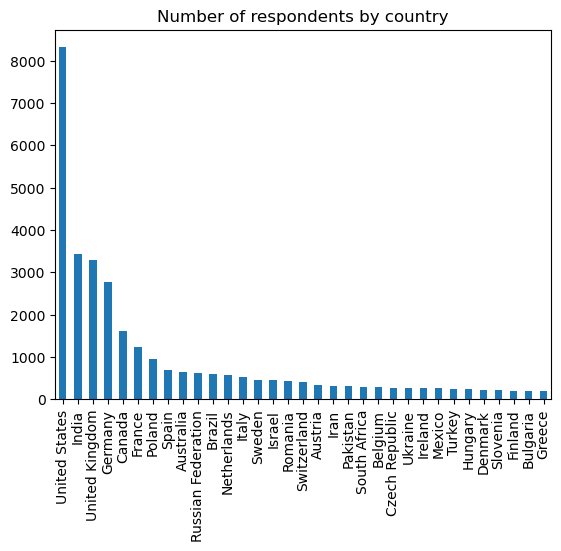

In [13]:
respondents.plot(x="Country", y="# of respondents", kind="bar", title = "Number of respondents by country")

In [14]:
#Question 2 - Are salaries dependant (at least in part) from the location of the programmer?

In [38]:
#Considerning only countries with more than 50 respondents and dropping NA values
data.dropna(inplace=True)
bigger_than_50 = data["Country"].value_counts() > 50
bigger_than_50 = bigger_than_50.sort_index()
bigger_than_50.head(20)

Afghanistan           False
Albania               False
Anguilla              False
Argentina              True
Armenia               False
Australia              True
Austria                True
Azerbaidjan           False
Bahrain               False
Bangladesh            False
Barbados              False
Belarus               False
Belgium                True
Bermuda               False
Bolivia               False
Bosnia-Herzegovina    False
Botswana              False
Brazil                 True
Bulgaria               True
Cambodia              False
Name: Country, dtype: bool

In [39]:
#Grouping data by country

salarydata = data.groupby("Country")["Salary"].mean()
salarydata.head(20)
salarydata = salarydata[bigger_than_50]

In [40]:
salarydata.head()

Country
Argentina    25771.287719
Australia    69215.755208
Austria      45299.012856
Belgium      39908.817204
Brazil       20726.773575
Name: Salary, dtype: float64

In [94]:
salarydata.describe()

count       36.000000
mean     39328.394200
std      22444.930132
min       8195.250180
25%      20894.218550
50%      32400.127789
75%      53690.671936
max      96183.322012
Name: Salary, dtype: float64

In [95]:
salarydata.median()

32400.127789060294

In [43]:

salarydata.sort_values(ascending=False, inplace=True)

<AxesSubplot:title={'center':'Salary ($) - selection of countries'}, xlabel='Country'>

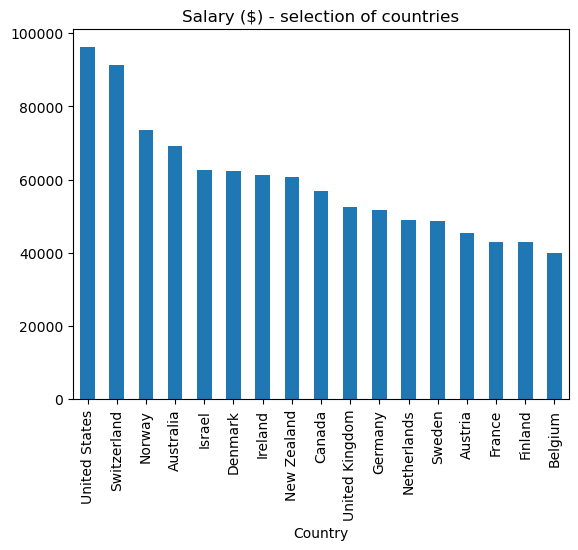

In [44]:
salarydata[salarydata > 39328].plot(x="Country", y= "Salary", kind="bar", title = "Salary ($) - selection of countries")

<AxesSubplot:title={'center':'Salary ($) - selection of countries'}, xlabel='Country'>

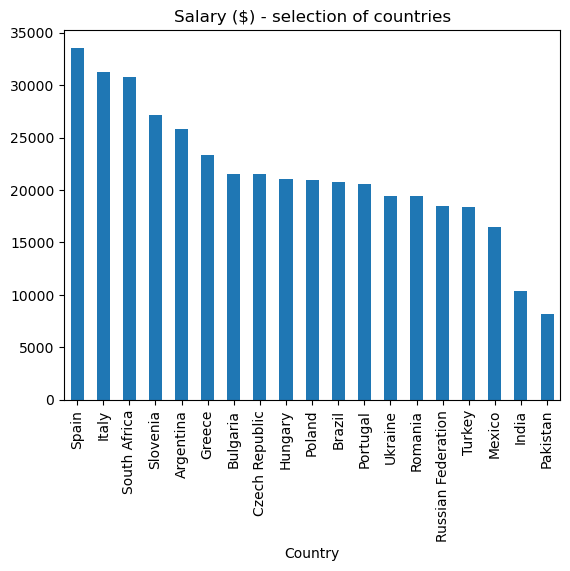

In [45]:
salarydata[salarydata < 39328].plot(x="Country", y= "Salary", kind="bar", title = "Salary ($) - selection of countries")

In [33]:
#Question 3 - How much do specific types of companies pay for a professional developer?

In [46]:
data.dropna()

,Respondent,Professional,Country,CompanyType,Salary
2,3,Professional developer,United Kingdom,Publicly-traded corporation,113750.000000
14,15,Professional developer,United Kingdom,Publicly-traded corporation,100000.000000
17,18,Professional developer,United States,Publicly-traded corporation,130000.000000
18,19,Professional developer,United States,Publicly-traded corporation,82500.000000
22,23,Professional developer,Israel,"Privately-held limited company, not in startup...",100764.000000
...,...,...,...,...,...
51371,51372,Professional developer,Netherlands,Pre-series A startup,74193.548387
51378,51379,Professional developer,Cyprus,Non-profit/non-governmental organization or pr...,107526.881720
51382,51383,Professional developer,France,I don't know,32258.064516
51387,51388,Professional developer,United States,I don't know,58000.000000


In [60]:
companytypes = data.CompanyType.value_counts()
companytypes

Privately-held limited company, not in startup mode                      5941
Publicly-traded corporation                                              2258
Sole proprietorship or partnership, not in startup mode                  1043
Venture-funded startup                                                    987
I don't know                                                              918
Government agency or public school/university                             535
Pre-series A startup                                                      419
Non-profit/non-governmental organization or private school/university     318
I prefer not to answer                                                    202
State-owned company                                                       140
Something else                                                            107
Name: CompanyType, dtype: int64

<AxesSubplot:title={'center':'Company types'}>

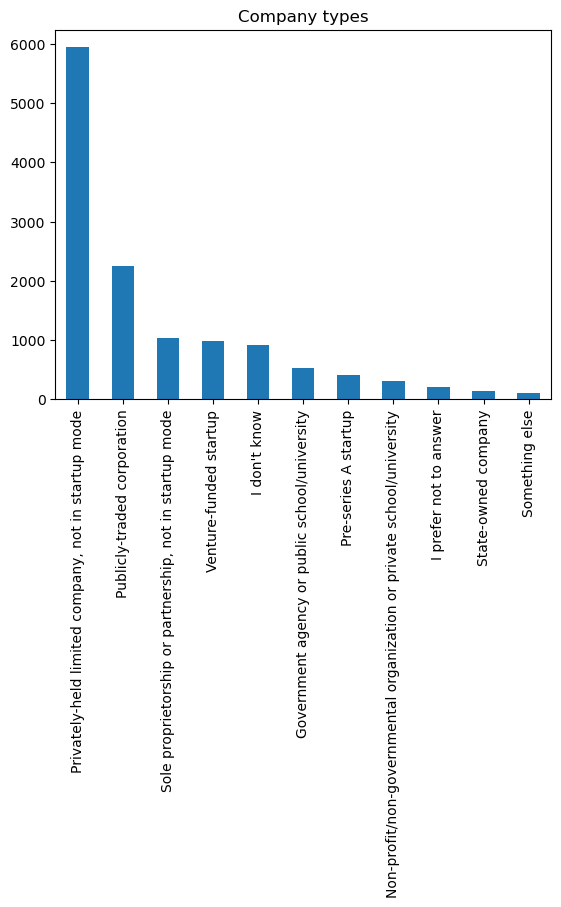

In [61]:
companytypes.plot(x="Country", y= "# of person employed", kind="bar", title = "Company types")

In [69]:
companysalary = data.groupby("CompanyType").Salary.mean().sort_values(ascending = False)

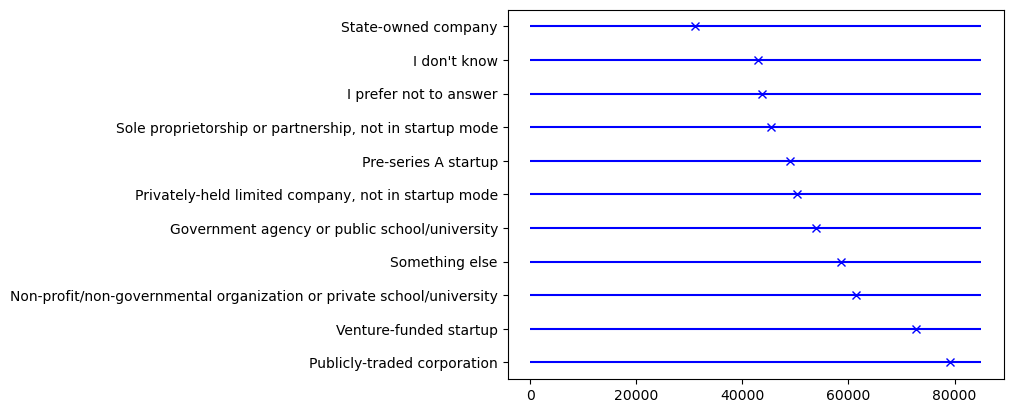

In [91]:
plt.hlines(y=list(companysalary.index), xmin=0, xmax=85000,
           color='blue')
plt.plot(list(companysalary), list(companysalary.index),'x', color='blue')
plt.show()